<a href="https://colab.research.google.com/github/martinbremm/kaggle-titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle's Titanic Competition

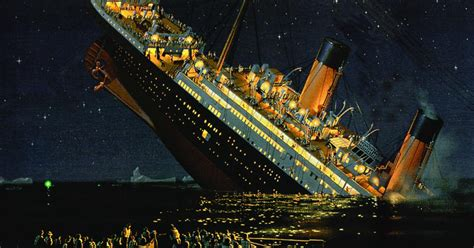

👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

<br> 

###The Challenge <br>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Logistic Regression
## Data Exploration

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

base_dir = '/content/gdrive/MyDrive/kaggle-titanic/'

Mounted at /content/gdrive


In [ ]:
!kaggle competitions download -c titanic-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
cd '/content/gdrive/MyDrive/kaggle-titanic/'

/content/gdrive/MyDrive/kaggle-titanic


In [ ]:
import pandas as pd

train_df = pd.read_csv('train.csv')

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


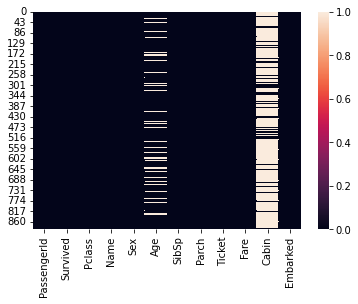

In [ ]:
# checking for missing values across columns
import seaborn as sns
sns.heatmap(pd.isna(train_df))

In [ ]:
# part of the df dealing with categorical variables
train_cat = train_df.drop(train_df.describe().columns.drop("Survived"), axis=1)
train_cat.head(n=5)

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
# checking whether the title of the passenger influences survival

import re

title = train_df["Name"].apply(lambda x: re.split(", ", x)[1].split(". ")[0])
title.value_counts()

married = title.apply(lambda x: 1 if x == "Mrs" else 0)

def title_grouping(title):
  if title in ["Don", "Jonkheer", "Lady", "Sir", "the Countess"]:
    title = "noble"
  elif title in ["Master", "Dr", "Rev"]:
    title = "scholar"
  elif title in ["Major", "Col", "Capt"]:
    title = "military"
  else:
    title = "common"
  return title

In [ ]:
title = title.apply(title_grouping)
title.value_counts()

common      828
scholar      53
noble         5
military      5
Name: Name, dtype: int64

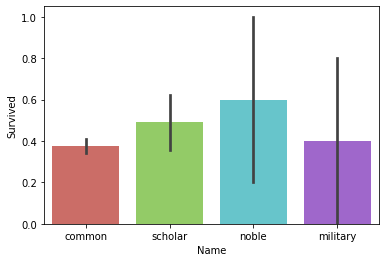

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = title, y = train_df["Survived"],
            palette = 'hls')
plt.show()

In [ ]:
ordered_title = title.astype('category').cat.set_categories(["common", "military", "scholar", "noble"], ordered=True)
ordered_title

0       common
1       common
2       common
3       common
4       common
        ...   
886    scholar
887     common
888     common
889     common
890     common
Name: Name, Length: 891, dtype: category
Categories (4, object): ['common' < 'military' < 'scholar' < 'noble']

In [ ]:
ordered_title.astype('category').cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
886    2
887    0
888    0
889    0
890    0
Length: 891, dtype: int8

In [ ]:
import re

def clean_data(df):

  # dropping SibSp
  df.dropna(axis="index", subset=['SibSp'], inplace=True)

  # dropping few missing embarked values
  df.dropna(axis="index", subset=['Embarked'], inplace=True)

  # filling up missing values
  df["Age"] = df["Age"].fillna(df["Age"].median())
  df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

  #df["num_cabins"] = df["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split()))

  # letter of the cabin (i.e., position in the ship)
  df["Cabin"] = df["Cabin"].fillna("X").apply(lambda x: x.strip()[0])

  # creating dummies for cabin_prefix
  df = pd.concat([df, pd.get_dummies(df["Cabin"], prefix="cab")], axis=1)

  # passenger title
  df["title"] = df["Name"].apply(lambda x: re.split(", ", x)[1].split(". ")[0])
  
  df["is_married"] = df["title"].apply(lambda x: 1 if x == "Mrs" else 0)

  df["title"] = df["title"].apply(title_grouping)
  
  # ordering titles according to survival
  df["title"] = df["title"].astype('category').cat.set_categories(["common", "military", "scholar", "noble"], ordered=True)
  df["title"] = df["title"].astype('category').cat.codes

  # creating dummies for sex
  df["Sex"] = df["Sex"].map({"male":1, "female":0})

  # creating dummies for embarking place
  df = pd.concat([df, pd.get_dummies(df["Embarked"], prefix="emb")], axis=1)

  df["is_child"] = df["Age"].apply(lambda age: 1 if age < 14 else 0)
  
  return df

In [ ]:
train_df = clean_data(train_df)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cab_F,cab_G,cab_T,cab_X,title,is_married,emb_C,emb_Q,emb_S,is_child
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,0,1,2,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,...,0,0,0,1,0,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,1,0,0,0


### dropping one dummy var as it can be explained by the others

In [ ]:
train_df.drop(["emb_C", "cab_T"], axis=1, inplace=True)

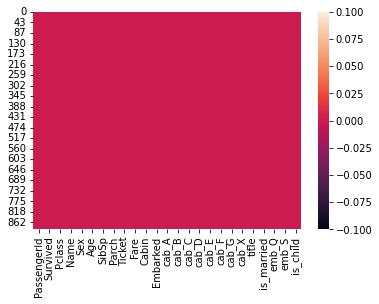

In [ ]:
sns.heatmap(pd.isna(train_df))

In [ ]:
train_ord = train_df[train_df.describe().columns]

In [ ]:
train_cat

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",male,211536,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,1,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  cab_A        889 non-null    uint8  
 13  cab_B        889 non-null    uint8  
 14  cab_C        889 non-null    uint8  
 15  cab_D        889 non-null    uint8  
 16  cab_E        889 non-null    uint8  
 17  cab_F        889 non-null    uint8  
 18  cab_G        889 non-null    uint8  
 19  cab_X   

## Checking the assumptions of logistic regression: 
1.   Multicollinearity between predictors by VIF
2.   Check for extreme outliers
3.   Linear Relationship Between Explanatory Variables and the Logit of the Response Variable using Box-Tidwell test

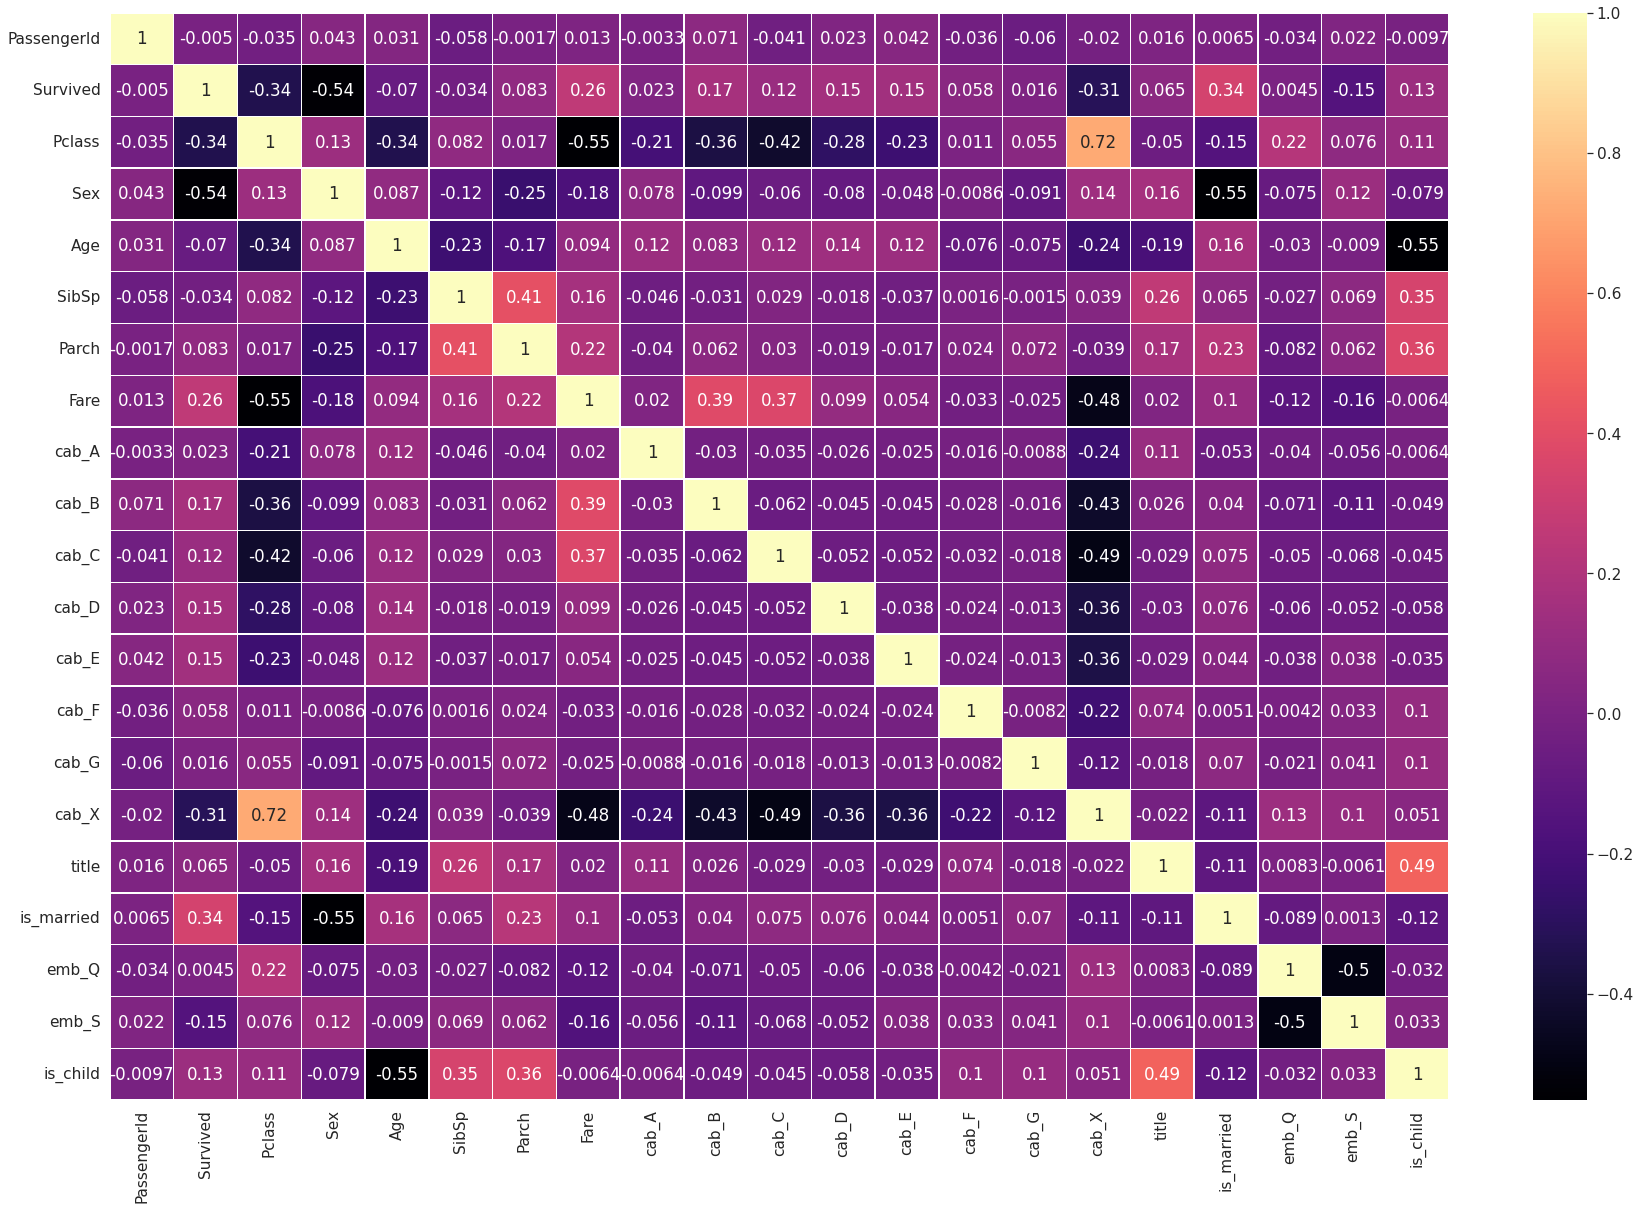

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train_corr = train_ord.corr(method="pearson")
plt.figure(figsize=(30, 20))
sns.set(font_scale=1.4)
sns.heatmap(train_corr, 
            annot=True, 
            linecolor='white', 
            linewidth=0.5, 
            cmap='magma');

Ticket class seems to be negatively correlated with survival, meaning that people in first class were more likely to survive than people in 2nd/3rd. Also, people who paid more seem to be more likely to survive.
Strong collinearity between pclass and fare.

Also, Sex is negatively related to survival, showing that men were less likely to survive (because of the coding 1="male", 0="female")

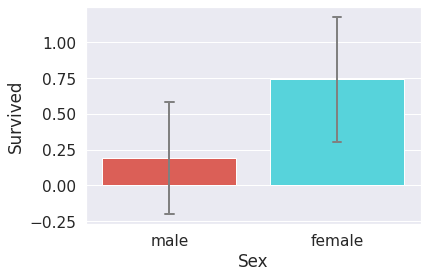

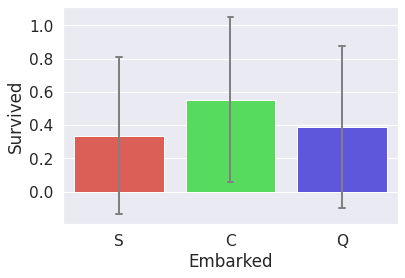

In [ ]:
for c in ["Sex","Embarked"]:
  sns.barplot(x = train_cat[c], y = train_cat["Survived"],
            palette = 'hls',
            #order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
  plt.show()

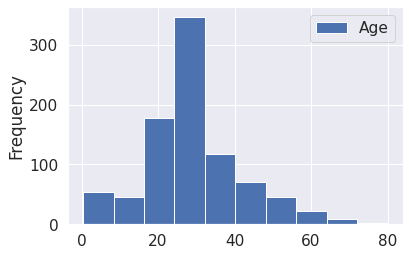

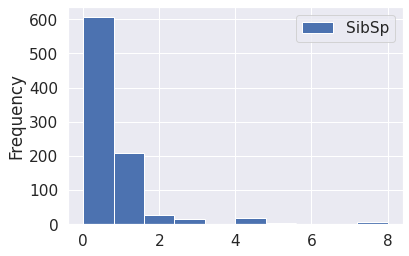

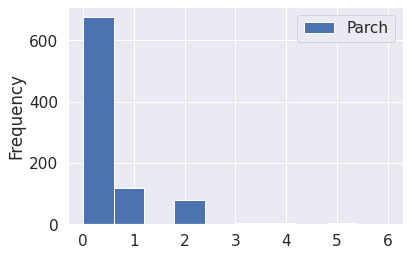

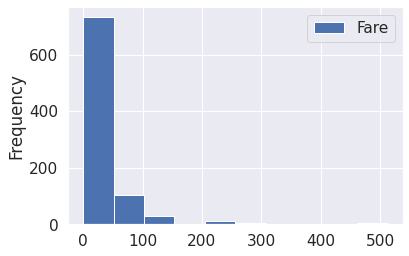

In [ ]:
for i in ["Age", "SibSp", "Parch", "Fare"]:
    train_df.plot(x = "Survived", y = i, kind="hist")

In [ ]:
# vif of > 10 suggests collinearity with another variable 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(train_ord.values, i) for i in range(len(train_ord.columns))]

vif_df = pd.DataFrame({"feature": train_ord.columns, "VIF": vif_values})

vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature,VIF
0,PassengerId,4.101490
1,Survived,2.865575
2,Pclass,26.473911
3,Sex,6.081271
4,Age,10.431043
5,SibSp,1.734420
6,Parch,1.837268
7,Fare,2.643769
8,cab_A,1.754148
9,cab_B,3.462052


In [ ]:
# Pearson’s correlation analysis using an arbitrary correlation threshold (absolute values)

threshold = 0.7
#train_corr_coll = train_corr[(train_corr > threshold) & (train_corr != 1)]

corr = train_corr.abs()

stack = corr.unstack()
stack_ordered = stack[(stack > threshold) & (stack != 1)].sort_values(ascending=False)

In [ ]:
stack_ordered

Pclass  cab_X     0.723815
cab_X   Pclass    0.723815
dtype: float64

# Logistic Regression

In [ ]:
import pandas as pd

test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


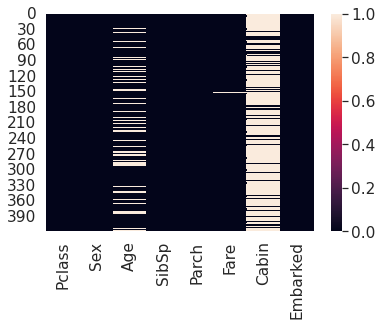

In [ ]:
x_test = test_df.drop(["Name", "PassengerId", "Ticket"], axis=1)

sns.heatmap(pd.isna(x_test))

In [ ]:
x_train = train_ord.drop(["PassengerId", "Survived"], axis=1)
y_train = train_ord["Survived"]

# cleaning and preprocessing test data
x_test = test_df.drop(["PassengerId", "Ticket"], axis=1)
x_test = clean_data(x_test)
x_test = x_test.drop(["Name", "emb_C"], axis=1)


x_test = x_test[x_test.describe().columns]

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_X,title,is_married,emb_Q,emb_S,is_child
0,3,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,1,0
4,3,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,1,2,0,0,1,0
887,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0,0,0,0,1,0
888,3,0,28.0,1,2,23.4500,0,0,0,0,0,0,0,1,0,0,0,1,0
889,1,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,cab_A,cab_B,cab_C,cab_D,cab_E,cab_F,cab_G,cab_X,title,is_married,emb_Q,emb_S,is_child
0,3,1,34.5,0,0,7.8292,0,0,0,0,0,0,0,1,0,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,0,0,0,0,0,1,0,1,0,1,0
2,2,1,62.0,0,0,9.6875,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,0,0,0,0,0,1,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,0,1,0
414,1,0,39.0,0,0,108.9000,0,0,1,0,0,0,0,0,0,0,0,0,0
415,3,1,38.5,0,0,7.2500,0,0,0,0,0,0,0,1,0,0,0,1,0
416,3,1,27.0,0,0,8.0500,0,0,0,0,0,0,0,1,0,0,0,1,0


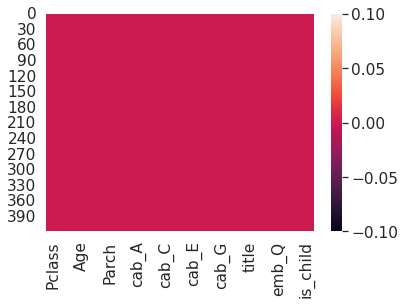

In [ ]:
sns.heatmap(pd.isna(x_test))

## Logistic Regression Model
Using the training data to predict y and comparing it to the actual y-values in the training data

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(solver='lbfgs', max_iter=1000)

LogisticReg.fit(x_train, y_train)

predictions = LogisticReg.predict(x_test)

In [ ]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Use score method to get accuracy of model
score = LogisticReg.score(x_train, y_train)
print(score)

0.8278965129358831


In [ ]:
submission_df = pd.DataFrame(data=list(zip(test_df["PassengerId"], predictions)), columns=["PassengerId", "Survived"])
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
from google.colab import files 

filename="LRG-titanic-submission.csv"

submission_df.to_csv(filename, index=False)
#files.download(filename)

# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.svm import SVC

# creating instance of SVM
support_vector = SVC(kernel="linear")

# training SVM
support_vector.fit(x_train, y_train)

predictions = support_vector.predict(x_test)

In [ ]:
#Use score method to get accuracy of model
score = support_vector.score(x_train, y_train)
print(score)

0.8211473565804275


In [ ]:
# evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#print(classification_report(x_train, y_train))

#print(confusion_matrix(x_train, y_train))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, 
                             splitter="random", # due to overfitting
                             min_samples_split=10)

clf.fit(x_train, y_train)

score = clf.score(x_train, y_train)
print(score)

0.8998875140607424


In [ ]:
from google.colab import files 

predictions = clf.predict(x_test)

filename="DTC-titanic-submission.csv"

submission_df = pd.DataFrame(data=list(zip(test_df["PassengerId"], predictions)), columns=["PassengerId", "Survived"])

submission_df.to_csv(filename, index=False)
#files.download(filename)

In [ ]:
#!kaggle competitions submit -c titanic -f DTC-titanic-submission.csv -m "DTC"

In [ ]:
ls

DTC-titanic-submission.csv  LRG-titanic-submission.csv  train.csv
GBC-titanic-submission.csv  test.csv                    x_test.csv
kaggle.json                 titanic-submission.csv


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0,
                                 learning_rate=0.1)

clf.fit(x_train, y_train)

score = clf.score(x_train, y_train)
print(score)

0.8931383577052868


In [ ]:
from google.colab import files 

predictions = clf.predict(x_test)

filename="GBC-titanic-submission.csv"

submission_df = pd.DataFrame(data=list(zip(test_df["PassengerId"], predictions)), columns=["PassengerId", "Survived"])

submission_df.to_csv(filename, index=False)
#files.download(filename)